In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def hmm_generater(transition_matrix,initial_prob,mean,sd,length):
    """
    generate a sequence of HMM data with fixed transition matrix, initial probability
    
    """
    res = []
    cur_state = np.random.choice(range(len(initial_prob)),1,True,initial_prob)[0]
    for _ in range(length):
        res.append(np.random.normal(mean[cur_state],sd[cur_state]))
        cur_state = np.random.choice(range(len(initial_prob)),1,True,transition_matrix[cur_state])[0]
    return res
        

class HMM_mixture_generater():
    '''
    The observation variable is 1D gaussian variable
    '''
    def __init__(self,transition_matrixs,cluster_initial_prob,states_initial_prob,mean,sd):
        """
        Input:
        transition_matrix: list[matrix[ni*ni]]
        cluster_initial_prob:list[] (sum to one)
        states_initial_prob:list[list[]]
        mean:list[list[]]
        sd:list[list[]]
        """
        self.M = len(transition_matrixs) #number of cluster
        self.states = [matrix.shape[0] for matrix in transition_matrixs] #number of states of each cluster
        self.transition_matrixs = transition_matrixs 
        self.cluster_initial_prob = cluster_initial_prob #the initial probability of cluster
        self.states_initial_prob = states_initial_prob # the initial probability of states in cluster, list [[n1],[n2]...,[nM]]  
        self.mean = mean #mean of each states in each cluster, list [[n1],[n2]...,[nM]]  
        self.sd = sd #variance of each states in each cluster,list [[n1],[n2]...,[nM]]
    
    def generate(self,n,length):
        res = []
        clusters = np.random.choice(range(self.M),n,True,self.cluster_initial_prob)
        for i in range(n):
            res.append(hmm_generater(self.transition_matrixs[clusters[i]],self.states_initial_prob[clusters[i]],self.mean[clusters[i]],
                                    self.sd[clusters[i]],length))
        return [res,clusters]

In [3]:
A1 = np.array([[0.6,0.4],[0.4,0.6]])
A2 = np.array([[0.9,0.1],[0.1,0.9]])

In [4]:
generater = HMM_mixture_generater([A1,A2],[0.3,0.7],[[0.3,0.7],[0.3,0.7]],[[0,3],[0,3]],[[1,1],[1,1]])

In [5]:
data,y = generater.generate(10,10)

In [6]:
def plot_sequences(sequences,y):
    n = len(sequences)
    length = len(max(sequences,key=len))
    plt.figure(figsize=(length,n*2))
    for i in range(1,n+1):
        plt.subplot(n,1,i)
        plt.plot(sequences[i-1])
        plt.title("from cluster %i"%y[i-1])
    plt.show()

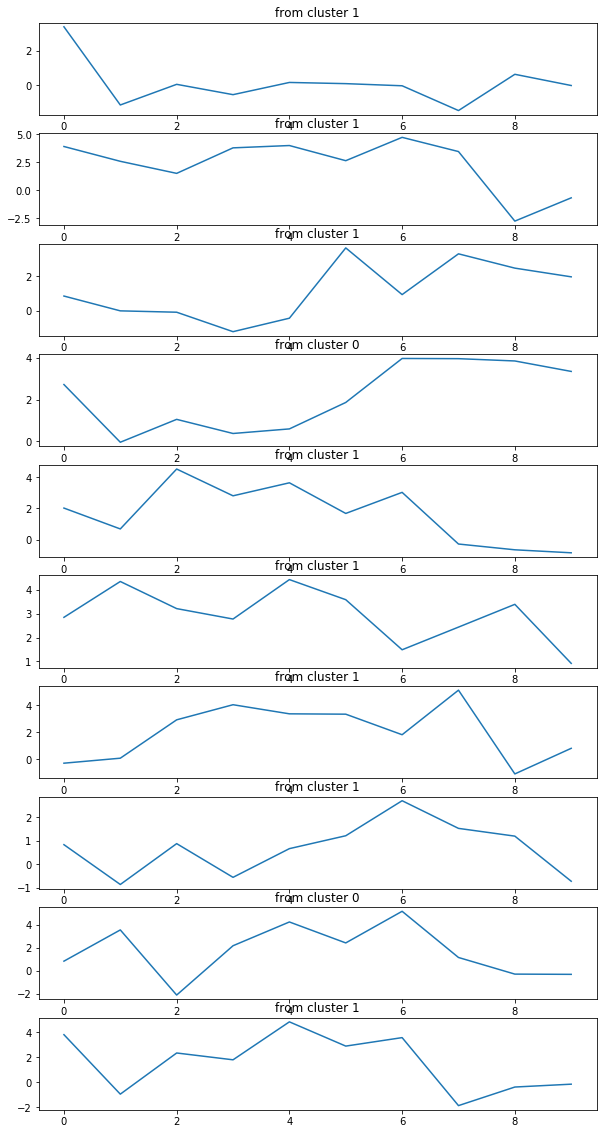

In [7]:
plot_sequences(data,y)

[1, 2, 3]